# Data Exploration

This notebook explores the Telco churn dataset after feature engineering.  
We will check:
1. Basic dataset info
2. Target distribution (churn vs. non-churn)
3. Numerical feature distributions
4. Categorical feature frequencies
5. Correlation heatmap


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.db_utils import load_features

# Load engineered dataset from SQL
df = load_features("sql/feature_engineering.sql")

print("Shape of dataset:", df.shape)
df.head(100)


Shape of dataset: (7043, 21)


/Users/tanjintoma/Desktop/Prepare_data_science/SQL/churn_IBM_dataset/telco-churn-prediction/src/db_utils.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,customer_id,gender,senior_citizen,partner,dependents,contract_type,paperless_billing,payment_method,tenure,monthly_charges,...,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn
0,7590-VHVEG,Female,0,Yes,No,Month-to-month,Yes,Electronic check,1,29.85,...,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,Male,0,No,No,One year,No,Mailed check,34,56.95,...,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,Month-to-month,Yes,Mailed check,2,53.85,...,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,7795-CFOCW,Male,0,No,No,One year,No,Bank transfer (automatic),45,42.30,...,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Female,0,No,No,Month-to-month,Yes,Electronic check,2,70.70,...,Yes,No,Fiber optic,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,Month-to-month,Yes,Electronic check,12,78.95,...,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Yes
96,9803-FTJCG,Male,0,Yes,Yes,One year,Yes,Credit card (automatic),71,66.85,...,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,No
97,0278-YXOOG,Male,0,No,No,Month-to-month,No,Mailed check,5,21.05,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
98,3212-KXOCR,Male,0,No,No,Two year,No,Bank transfer (automatic),52,21.00,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No


## 1. Basic Info
We first check data types, missing values, and summary statistics.


In [2]:
# Data types & missing values
df.info()

# Summary statistics
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   contract_type      7043 non-null   object 
 6   paperless_billing  7043 non-null   object 
 7   payment_method     7043 non-null   object 
 8   tenure             7043 non-null   int64  
 9   monthly_charges    7043 non-null   float64
 10  total_charges      7032 non-null   float64
 11  phone_service      7043 non-null   object 
 12  multiple_lines     7043 non-null   object 
 13  internet_service   7043 non-null   object 
 14  online_security    7043 non-null   object 
 15  online_backup      7043 non-null   object 
 16  device_protection  7043 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
senior_citizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contract_type,7043,3,Month-to-month,3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paperless_billing,7043,2,Yes,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,7043,4,Electronic check,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
monthly_charges,7043.0,NaN,NaN,NaN,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


## 2. Target Distribution
Let's see the balance between churn and non-churn customers.


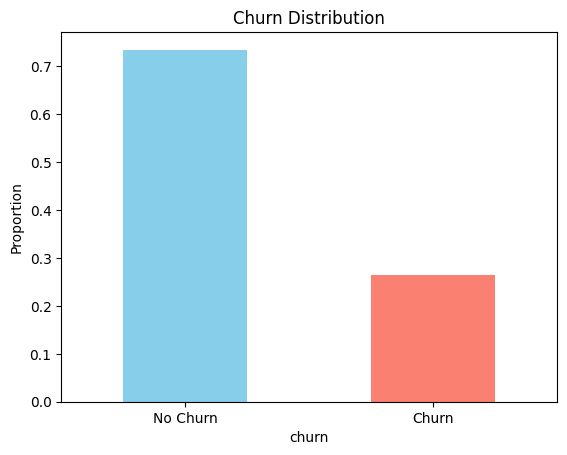

In [3]:
df['churn'].value_counts(normalize=True).plot(
    kind="bar",
    color=["skyblue", "salmon"],
    title="Churn Distribution"
)
plt.xticks([0,1], ["No Churn", "Churn"], rotation=0)
plt.ylabel("Proportion")
plt.show()


## 3. Numerical Feature Distributions
Histograms of numeric columns (e.g., charges, tenure).


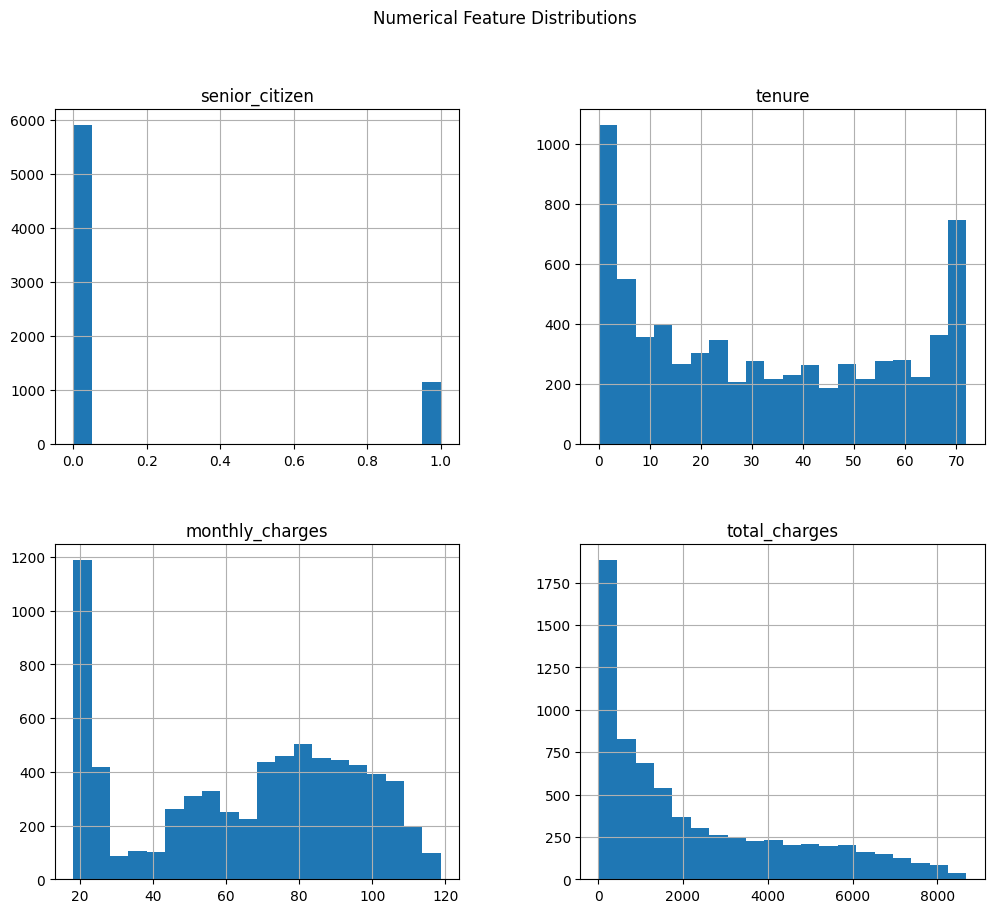

In [4]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

df[numeric_cols].hist(figsize=(12,10), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()


## 4. Categorical Feature Frequencies
Countplots of categorical features split by churn.


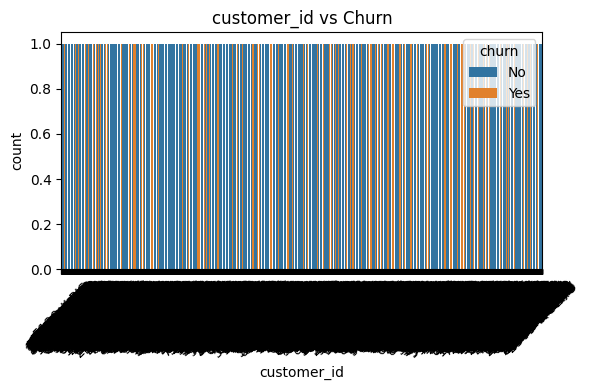

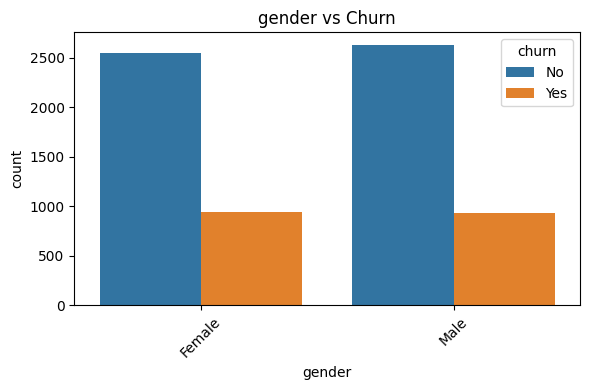

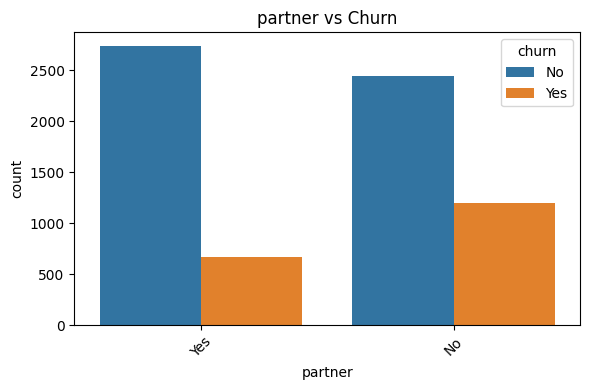

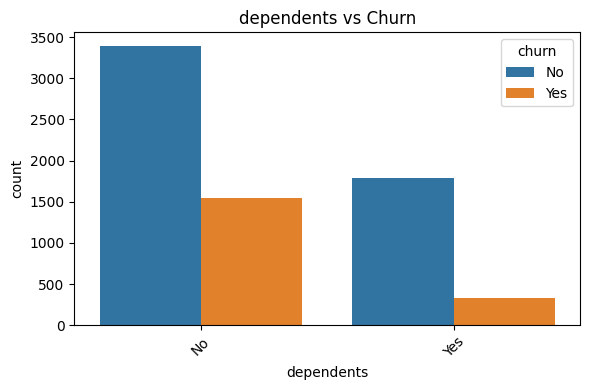

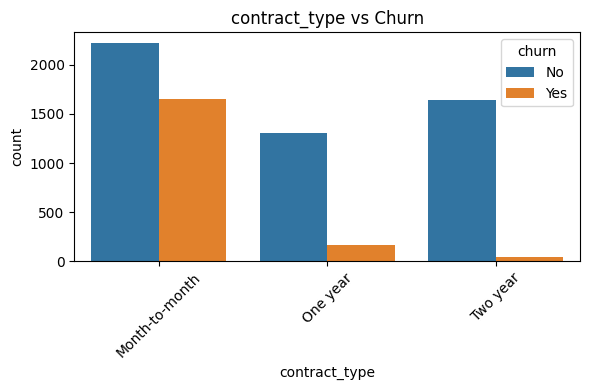

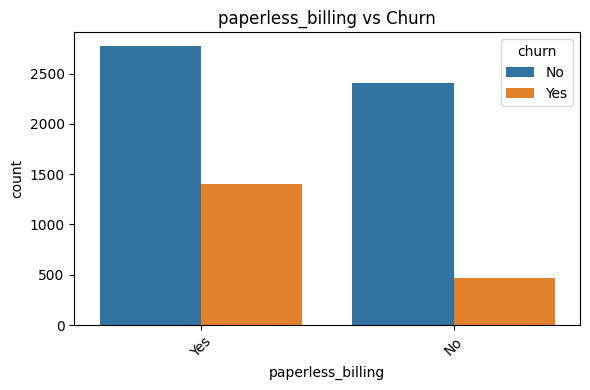

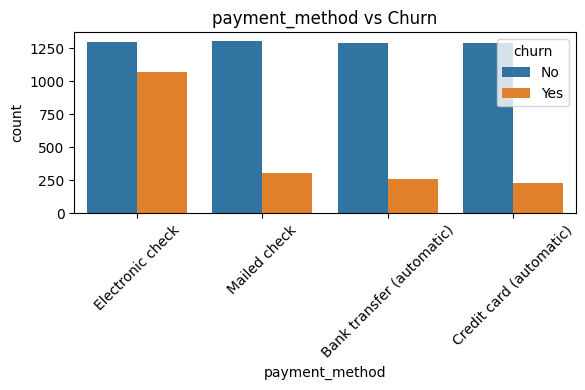

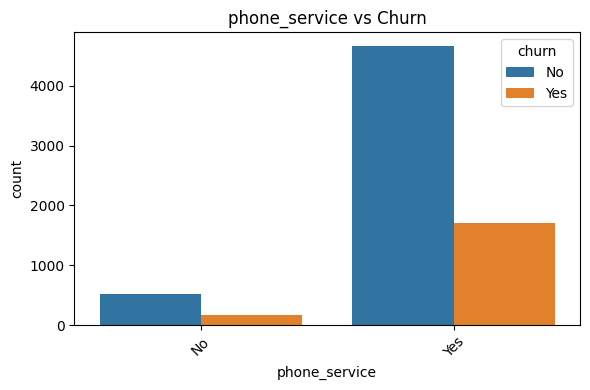

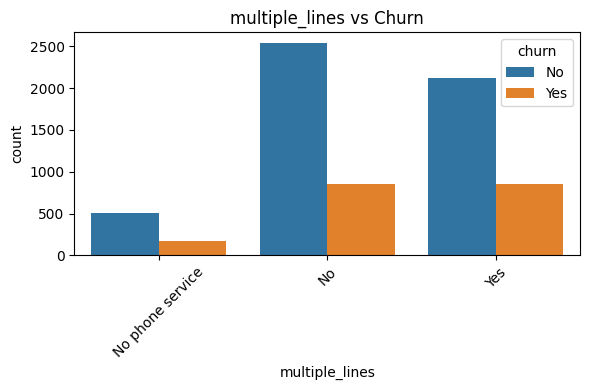

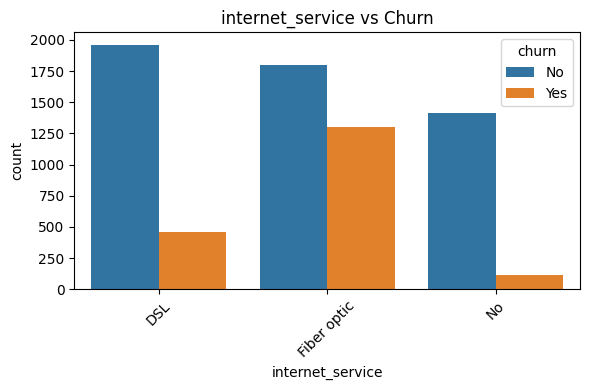

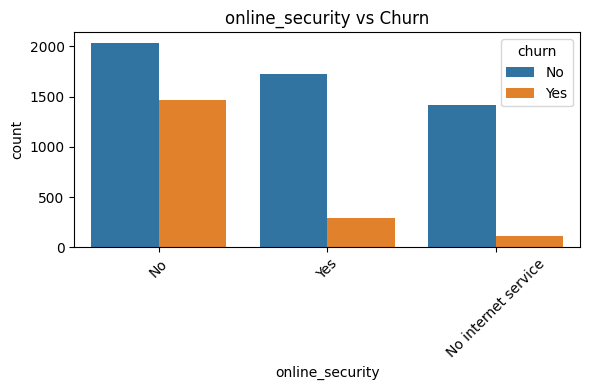

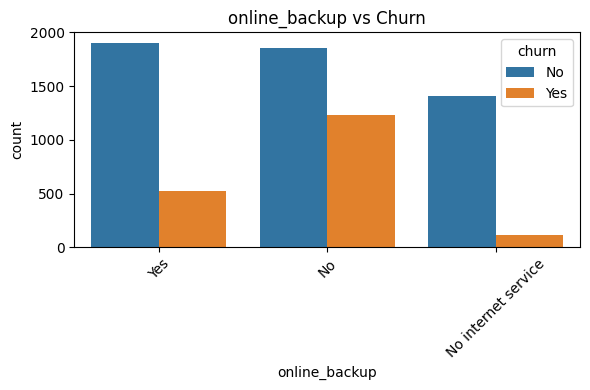

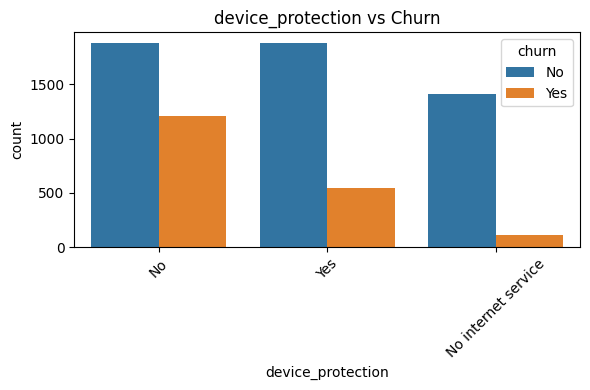

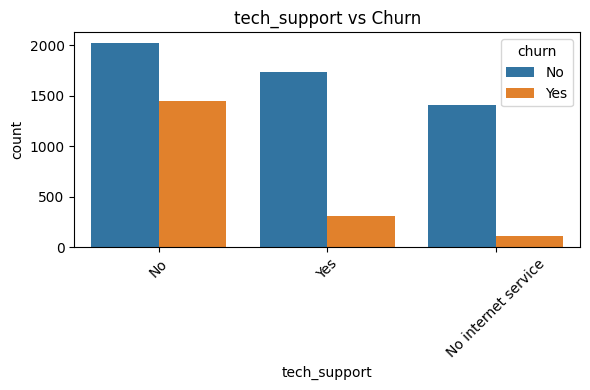

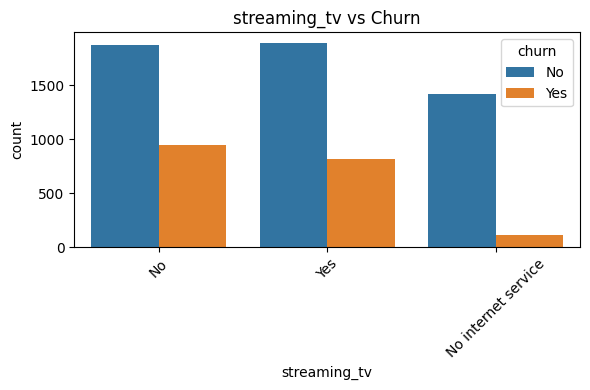

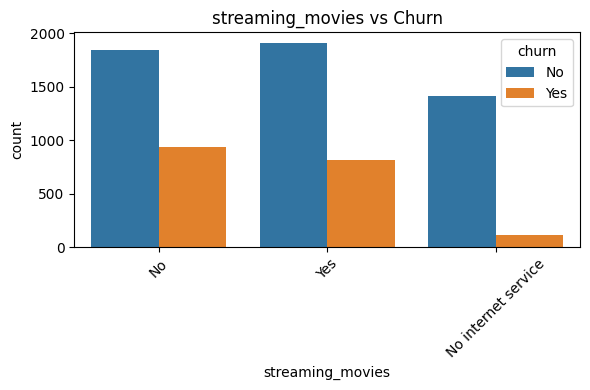

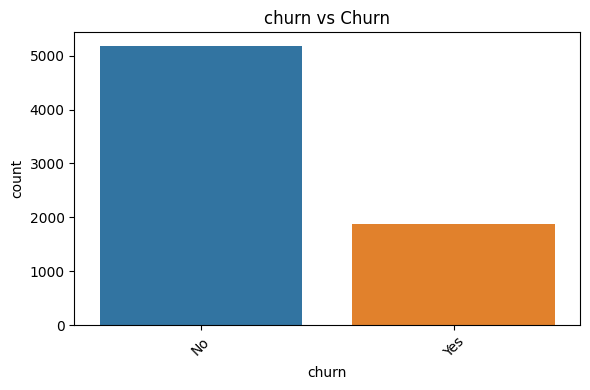

In [5]:
categorical_cols = df.select_dtypes(include=['object','bool']).columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="churn")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 5. Correlation Heatmap
Check correlations between numeric features to identify multicollinearity.


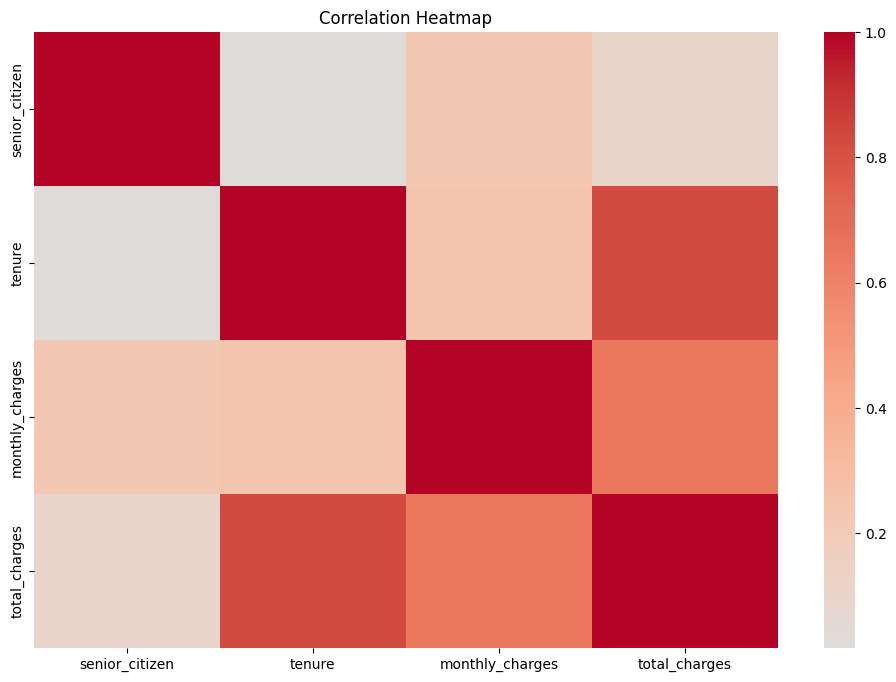

In [6]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()
